# Data Analysis

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from urllib import request, error
import sys, requests, shutil, os
from skimage.io import imsave, imread
import cv2

from keras.utils import np_utils

import os,cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

from keras import backend as K
K.set_image_dim_ordering('tf')

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam

C:\Users\ankit\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
#train_data = np.genfromtxt('train.csv', delimiter=',')
train_data= pd.read_csv('C:/Users/ankit/My_WorkSpace/UGA_MS_CS/UGA_Spring_2018/Data_Science_Practicum/Team_BullDawgs_Final_Project/train.csv')

Shape of the data 

In [4]:
train_data.shape

(1225029, 3)

View the dataset

In [5]:
train_data.head(10)

,id,url,landmark_id
0,cacf8152e2d2ae60,http://static.panoramio.com/photos/original/70...,4676
1,0a58358a2afd3e4e,http://lh6.ggpht.com/-igpT6wu0mIA/ROV8HnUuABI/...,6651
2,6b2bb500b6a38aa0,http://lh6.ggpht.com/-vKr5G5MEusk/SR6r6SJi6mI/...,11284
3,b399f09dee9c3c67,https://lh3.googleusercontent.com/-LOW2cjAqubA...,8429
4,19ace29d77a5be66,https://lh5.googleusercontent.com/-tnmSXwQcWL8...,6231
5,2c9c54b62f0a6a37,https://lh5.googleusercontent.com/-mEaSECO7D-4...,10400
6,0aac70a1de44ced6,http://lh6.ggpht.com/-cJMh9AYQGk8/SOkF_Q5PrjI/...,9779
7,de770bc720f8e714,https://lh4.googleusercontent.com/-Q_FvRlwaaa8...,11288
8,dc9457d703e612ad,https://lh3.googleusercontent.com/-Px33Q-wekRI...,13170
9,3060f5f75d936abb,http://lh3.ggpht.com/-KXyELwqwp_Q/Ry-qmQAqwUI/...,6051


Viewing a sample image

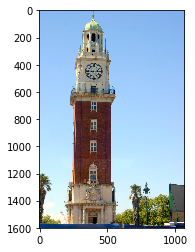

In [6]:
a = train_data['url'][12939]
image = imread(a)
plt.imshow(image)

Most frequent landmarks

In [11]:
tem = pd.DataFrame(train_data.landmark_id.value_counts().head(15))
tem

,landmark_id
9633,50337
6051,50148
6599,23415
9779,18471
2061,13271
5554,11147
6651,9508
6696,9222
5376,9216
2743,8997


In [8]:
train_data.shape

filtered_data = train_data.query('landmark_id == 6696 or landmark_id == 6651 or landmark_id == 5376 or landmark_id == 2743')
train_data.shape, filtered_data.shape

((1225029, 3), (36943, 3))

In [5]:
filtered_data_6696 = train_data.query('landmark_id == 6696')
filtered_data_6651 = train_data.query('landmark_id == 6651')
filtered_data_5376 = train_data.query('landmark_id == 5376')
filtered_data_2743 = train_data.query('landmark_id == 2743')

'https://lh5.googleusercontent.com/-NeLQCAPfqYM/Sg0NAtlhuOI/AAAAAAAACio/i6vVj1mZepc/s1600/'

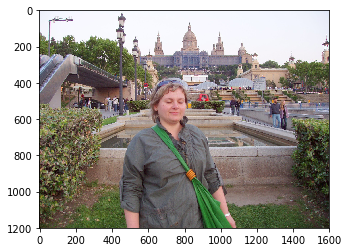

In [18]:
b = filtered_data_6696.iloc[309]['url']
#b = filtered_data_6696.get_value(409, 'url')
image_b = imread(b)
plt.imshow(image_b)
b

In [11]:

img_data_6696= []
img_data_6651= []
img_data_5376= []
img_data_2743= []
for x in range(0,800):
    a= filtered_data_6696.iloc[x]['url']
    b= filtered_data_6651.iloc[x]['url']
    c= filtered_data_5376.iloc[x]['url']
    d= filtered_data_2743.iloc[x]['url']
    
    failed_images_a = 0;
    failed_images_b = 0;
    failed_images_c = 0;
    failed_images_d = 0;
    
    try:
        image_a = imread(a)
        img_a = cv2.cvtColor(image_a, cv2.COLOR_BGR2GRAY)
        img_resize_a = cv2.resize(img_a,(128,128))
        
        image_b = imread(b)
        img_b = cv2.cvtColor(image_b, cv2.COLOR_BGR2GRAY)
        img_resize_b = cv2.resize(img_b,(128,128))
        
        image_c = imread(c)
        img_c = cv2.cvtColor(image_c, cv2.COLOR_BGR2GRAY)
        img_resize_c = cv2.resize(img_c, (128,128))
        
        image_d = imread(d)
        img_d = cv2.cvtColor(image_d, cv2.COLOR_BGR2GRAY)
        img_resize_d = cv2.resize(img_d,(128,128))
        
        img_data_6696.append(img_resize_a)
        img_data_6651.append(img_resize_b)
        img_data_5376.append(img_resize_c)
        img_data_2743.append(img_resize_d)
    except:
        print('Warning: Could not download ')
        failed_images_a += failed_images_a
    
    print('finished one round ',x)
    
    

finished one round  0
finished one round  1
finished one round  2
finished one round  3
finished one round  4
finished one round  5
finished one round  6
finished one round  7
finished one round  8
finished one round  9
finished one round  10
finished one round  11
finished one round  12
finished one round  13
finished one round  14
finished one round  15
finished one round  16
finished one round  17
finished one round  18
finished one round  19
finished one round  20
finished one round  21
finished one round  22
finished one round  23
finished one round  24
finished one round  25
finished one round  26
finished one round  27
finished one round  28
finished one round  29
finished one round  30
finished one round  31
finished one round  32
finished one round  33
finished one round  34
finished one round  35
finished one round  36
finished one round  37
finished one round  38
finished one round  39
finished one round  40
finished one round  41
finished one round  42
finished one round  4

finished one round  343
finished one round  344
finished one round  345
finished one round  346
finished one round  347
finished one round  348
finished one round  349
finished one round  350
finished one round  351
finished one round  352
finished one round  353
finished one round  354
finished one round  355
finished one round  356
finished one round  357
finished one round  358
finished one round  359
finished one round  360
finished one round  361
finished one round  362
finished one round  363
finished one round  364
finished one round  365
finished one round  366
finished one round  367
finished one round  368
finished one round  369
finished one round  370
finished one round  371
finished one round  372
finished one round  373
finished one round  374
finished one round  375
finished one round  376
finished one round  377
finished one round  378
finished one round  379
finished one round  380
finished one round  381
finished one round  382
finished one round  383
finished one rou

finished one round  674
finished one round  675
finished one round  676
finished one round  677
finished one round  678
finished one round  679
finished one round  680
finished one round  681
finished one round  682
finished one round  683
finished one round  684
finished one round  685
finished one round  686
finished one round  687
finished one round  688
finished one round  689
finished one round  690
finished one round  691
finished one round  692
finished one round  693
finished one round  694
finished one round  695
finished one round  696
finished one round  697
finished one round  698
finished one round  699
finished one round  700
finished one round  701
finished one round  702
finished one round  703
finished one round  704
finished one round  705
finished one round  706
finished one round  707
finished one round  708
finished one round  709
finished one round  710
finished one round  711
finished one round  712
finished one round  713
finished one round  714
finished one rou

In [13]:
img_data_6696 = np.array(img_data_6696)
img_data_6651 = np.array(img_data_6651)
img_data_5376 = np.array(img_data_5376)
img_data_2743 = np.array(img_data_2743)

In [16]:
img_data_6696.shape, img_data_6651.shape, img_data_5376.shape, img_data_2743.shape

((783, 128, 128), (783, 128, 128), (783, 128, 128), (783, 128, 128))

In [17]:
np.save('img_data_6696.npy', img_data_6696)
np.save('img_data_6651.npy', img_data_6651)
np.save('img_data_5376.npy', img_data_5376)
np.save('img_data_2743.npy', img_data_2743)

In [19]:
my_load= np.load('img_data_2743.npy')
my_load[3]

array([[254, 254, 254, ...,  31, 111,  16],
       [253, 254, 253, ...,  60,   5,  13],
       [254, 254, 254, ..., 145,   5,  15],
       ...,
       [  0,   0,   0, ..., 112, 117,  72],
       [ 38,  37,  48, ..., 108,  94,  62],
       [  1,   0,   0, ..., 115,  94,  61]], dtype=uint8)

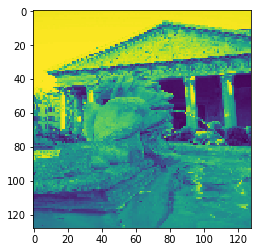

In [28]:
plt.imshow(my_load[401])

In [37]:
imgs_6696 = np.load('img_data_6696.npy')
imgs_6651 = np.load('img_data_6651.npy')
imgs_5376 = np.load('img_data_5376.npy')
imgs_2743 = np.load('img_data_2743.npy')

imgs_6696 = imgs_6696.astype('float32')
imgs_6696 /= 255
imgs_6696= imgs_6696[...,np.newaxis]

imgs_6651 = imgs_6651.astype('float32')
imgs_6651 /= 255
imgs_6651= imgs_6651[...,np.newaxis]

imgs_5376 = imgs_5376.astype('float32')
imgs_5376 /= 255
imgs_5376= imgs_5376[...,np.newaxis]

imgs_2743 = imgs_2743.astype('float32')
imgs_2743 /= 255
imgs_2743= imgs_2743[...,np.newaxis]

imgs_data = np.concatenate((imgs_6696, imgs_6651, imgs_5376, imgs_2743))
imgs_data.shape, imgs_5376.shape


((3132, 128, 128, 1), (783, 128, 128, 1))

In [65]:
num_classes= 4
num_images = imgs_data.shape[0]
labels = np.ones((num_images,), dtype= 'int64')

labels[0:782] = 0
labels[783:1565] = 1
labels[1566:2348] = 2
labels[2349:3131] = 3

names = [6696,6651,5376,2743]

# convert class labels to on-hot encoding 
Y = np_utils.to_categorical(labels, num_classes)

#Shuffling the dataset
x,y = shuffle(imgs_data,Y, random_state=2)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [62]:
#Defining the model
input_shape = imgs_data[0].shape

model = Sequential()

model.add(Conv2D(32, (3,3),input_shape=input_shape, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
#model.add(Convolution2D(64, 3, 3))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])

In [63]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 128, 128, 32)      320       
_________________________________________________________________
activation_26 (Activation)   (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 126, 126, 32)      9248      
_________________________________________________________________
activation_27 (Activation)   (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 61, 61, 64)        18496     
__________

In [66]:
hist = model.fit(X_train, y_train, batch_size=16, nb_epoch=20, verbose=1, validation_data=(X_test, y_test))

C:\Users\ankit\Anaconda3\lib\site-packages\keras\models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 2505 samples, validate on 627 samples
Epoch 1/20
2505/2505 [==============================] - 358s - loss: 1.3852 - acc: 0.3780 - val_loss: 1.2098 - val_acc: 0.5056
Epoch 2/20
2505/2505 [==============================] - 343s - loss: 1.1398 - acc: 0.5142 - val_loss: 1.0867 - val_acc: 0.5423
Epoch 3/20
2505/2505 [==============================] - 303s - loss: 1.0393 - acc: 0.5697 - val_loss: 0.9648 - val_acc: 0.6603
Epoch 4/20
2505/2505 [==============================] - 301s - loss: 0.9644 - acc: 0.6104 - val_loss: 0.9742 - val_acc: 0.6651
Epoch 5/20
2505/2505 [==============================] - 300s - loss: 0.8934 - acc: 0.6611 - val_loss: 0.7608 - val_acc: 0.7496
Epoch 6/20
2505/2505 [==============================] - 306s - loss: 0.8035 - acc: 0.6914 - val_loss: 0.6584 - val_acc: 0.7863
Epoch 7/20
2505/2505 [==============================] - 312s - loss: 0.7529 - acc: 0.7261 - val_loss: 0.6362 - val_acc: 0.7799
Epoch 8/20
2505/2505 [==============================] - 303s - l

In [67]:
score = model.evaluate(X_test, y_test, verbose=0)
score[0], score[1]

(0.5212548744925661, 0.8484848491502911)

In [68]:
model.save('model.h5')